In [1]:
# Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv data
df = pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


1. Since instances are simply the numbring which has no significance on the target variable.
2. dteday infrence is already drawn in the data set such as column 'yr', 'mnth', 'holiday', 'weekday' and 'workingday', so we can directly drop it, if in case it was not given then we have to make all these inference out.
3. 'casual' and 'registered' columns are making the same inference as 'cnt'. The sum of 'casual' and 'registered' columns are 'cnt'. So I have selected 'cnt' as the target variable and droped 'casual' and 'registered' columns.

In [4]:
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis =1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Now plotting the box plot to see any outlier

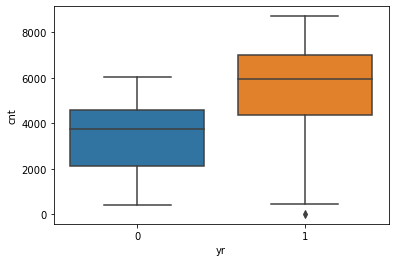

In [5]:
sns.boxplot(x= 'yr', y = 'cnt', data = df)
plt.show()

0 is 2018 and 1 is 2019 
2019 is having the outlier at the lower quantile range, which we can rewrite the count value at 10 percentile, so that the error reduces. But I are not removing it now

More number of count of rental are in 2019. We can say that as the year is passing this kind ofbike rental idea is spreading and more number of people were opting for this

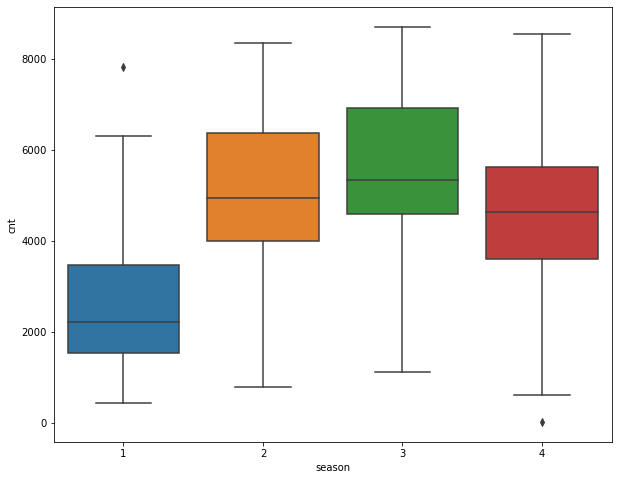

In [6]:
plt.figure(figsize = (10,8))
sns.boxplot(x= 'season', y = 'cnt', data = df)
plt.show()

1:spring, 2:summer, 3:fall, 4:winter. 
Spring and Winter are having outlier on the upper and lower region respectively.

Maximum number of rental were in the fall seasion, may e because of nice weather.

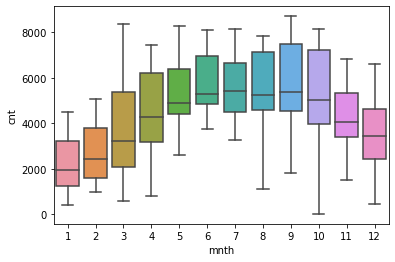

In [7]:
#plt.figure(figsize = (10,10))
sns.boxplot(x= 'mnth', y = 'cnt', data = df)
plt.show()

The number are according to the conventional way of numbering the months
Most bikes were rented after summer, in fall and autom season.

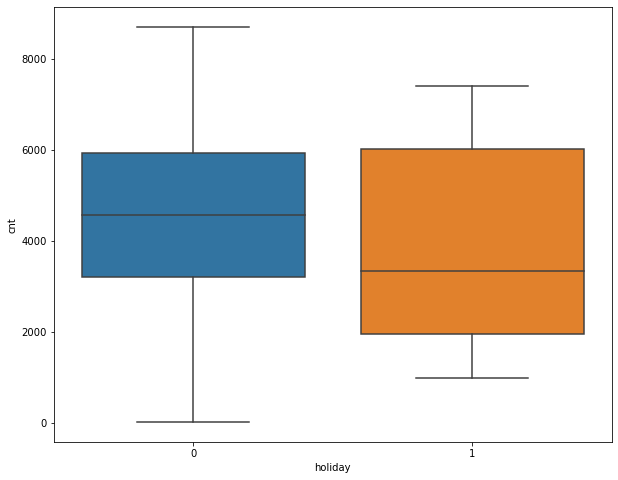

In [8]:
plt.figure(figsize = (10,8))
sns.boxplot(x= 'holiday', y = 'cnt', data = df)
plt.show()

More number of bike were rented during working day as the office and school going people might be taking it for there cummuting. We can say it because we the median of a non holiday is more that the holiday 


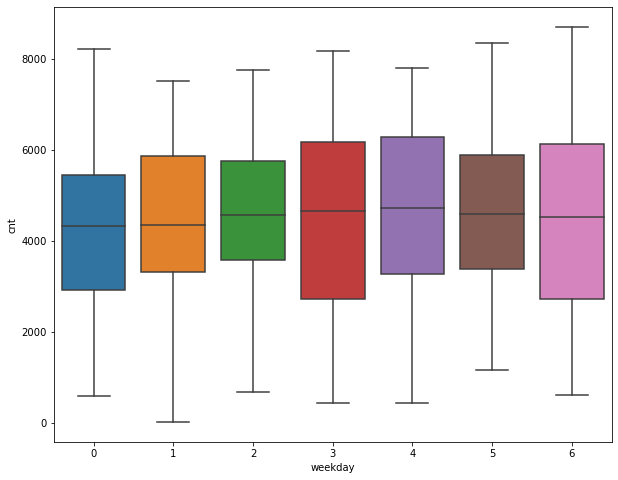

In [9]:
plt.figure(figsize = (10,8))
sns.boxplot(x= 'weekday', y = 'cnt', data = df)
plt.show()

Mostly it has the same count of bike rental in weekday, similar trend we have send in the above graph.

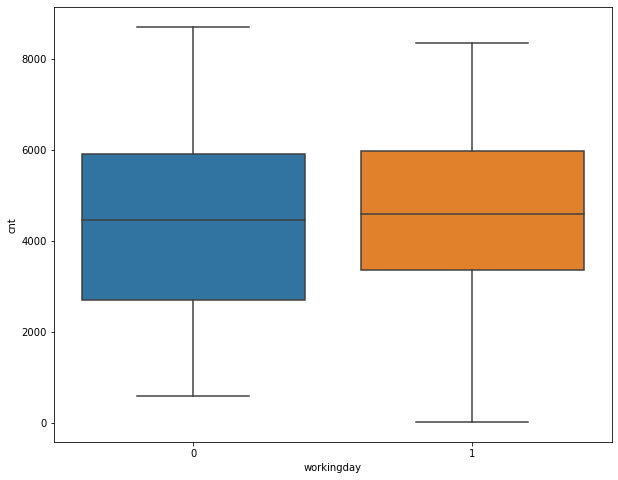

In [10]:
plt.figure(figsize = (10,8))
sns.boxplot(x= 'workingday', y = 'cnt', data = df)
plt.show()

Mostly it has the same count of bike rental in workingday, similar trend we have send in the above graph.

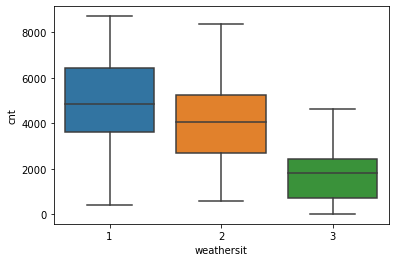

In [11]:
#plt.figure(figsize = (10,8))
sns.boxplot(x= 'weathersit', y = 'cnt', data = df)
plt.show()

1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

most bike were rented in a clear day.

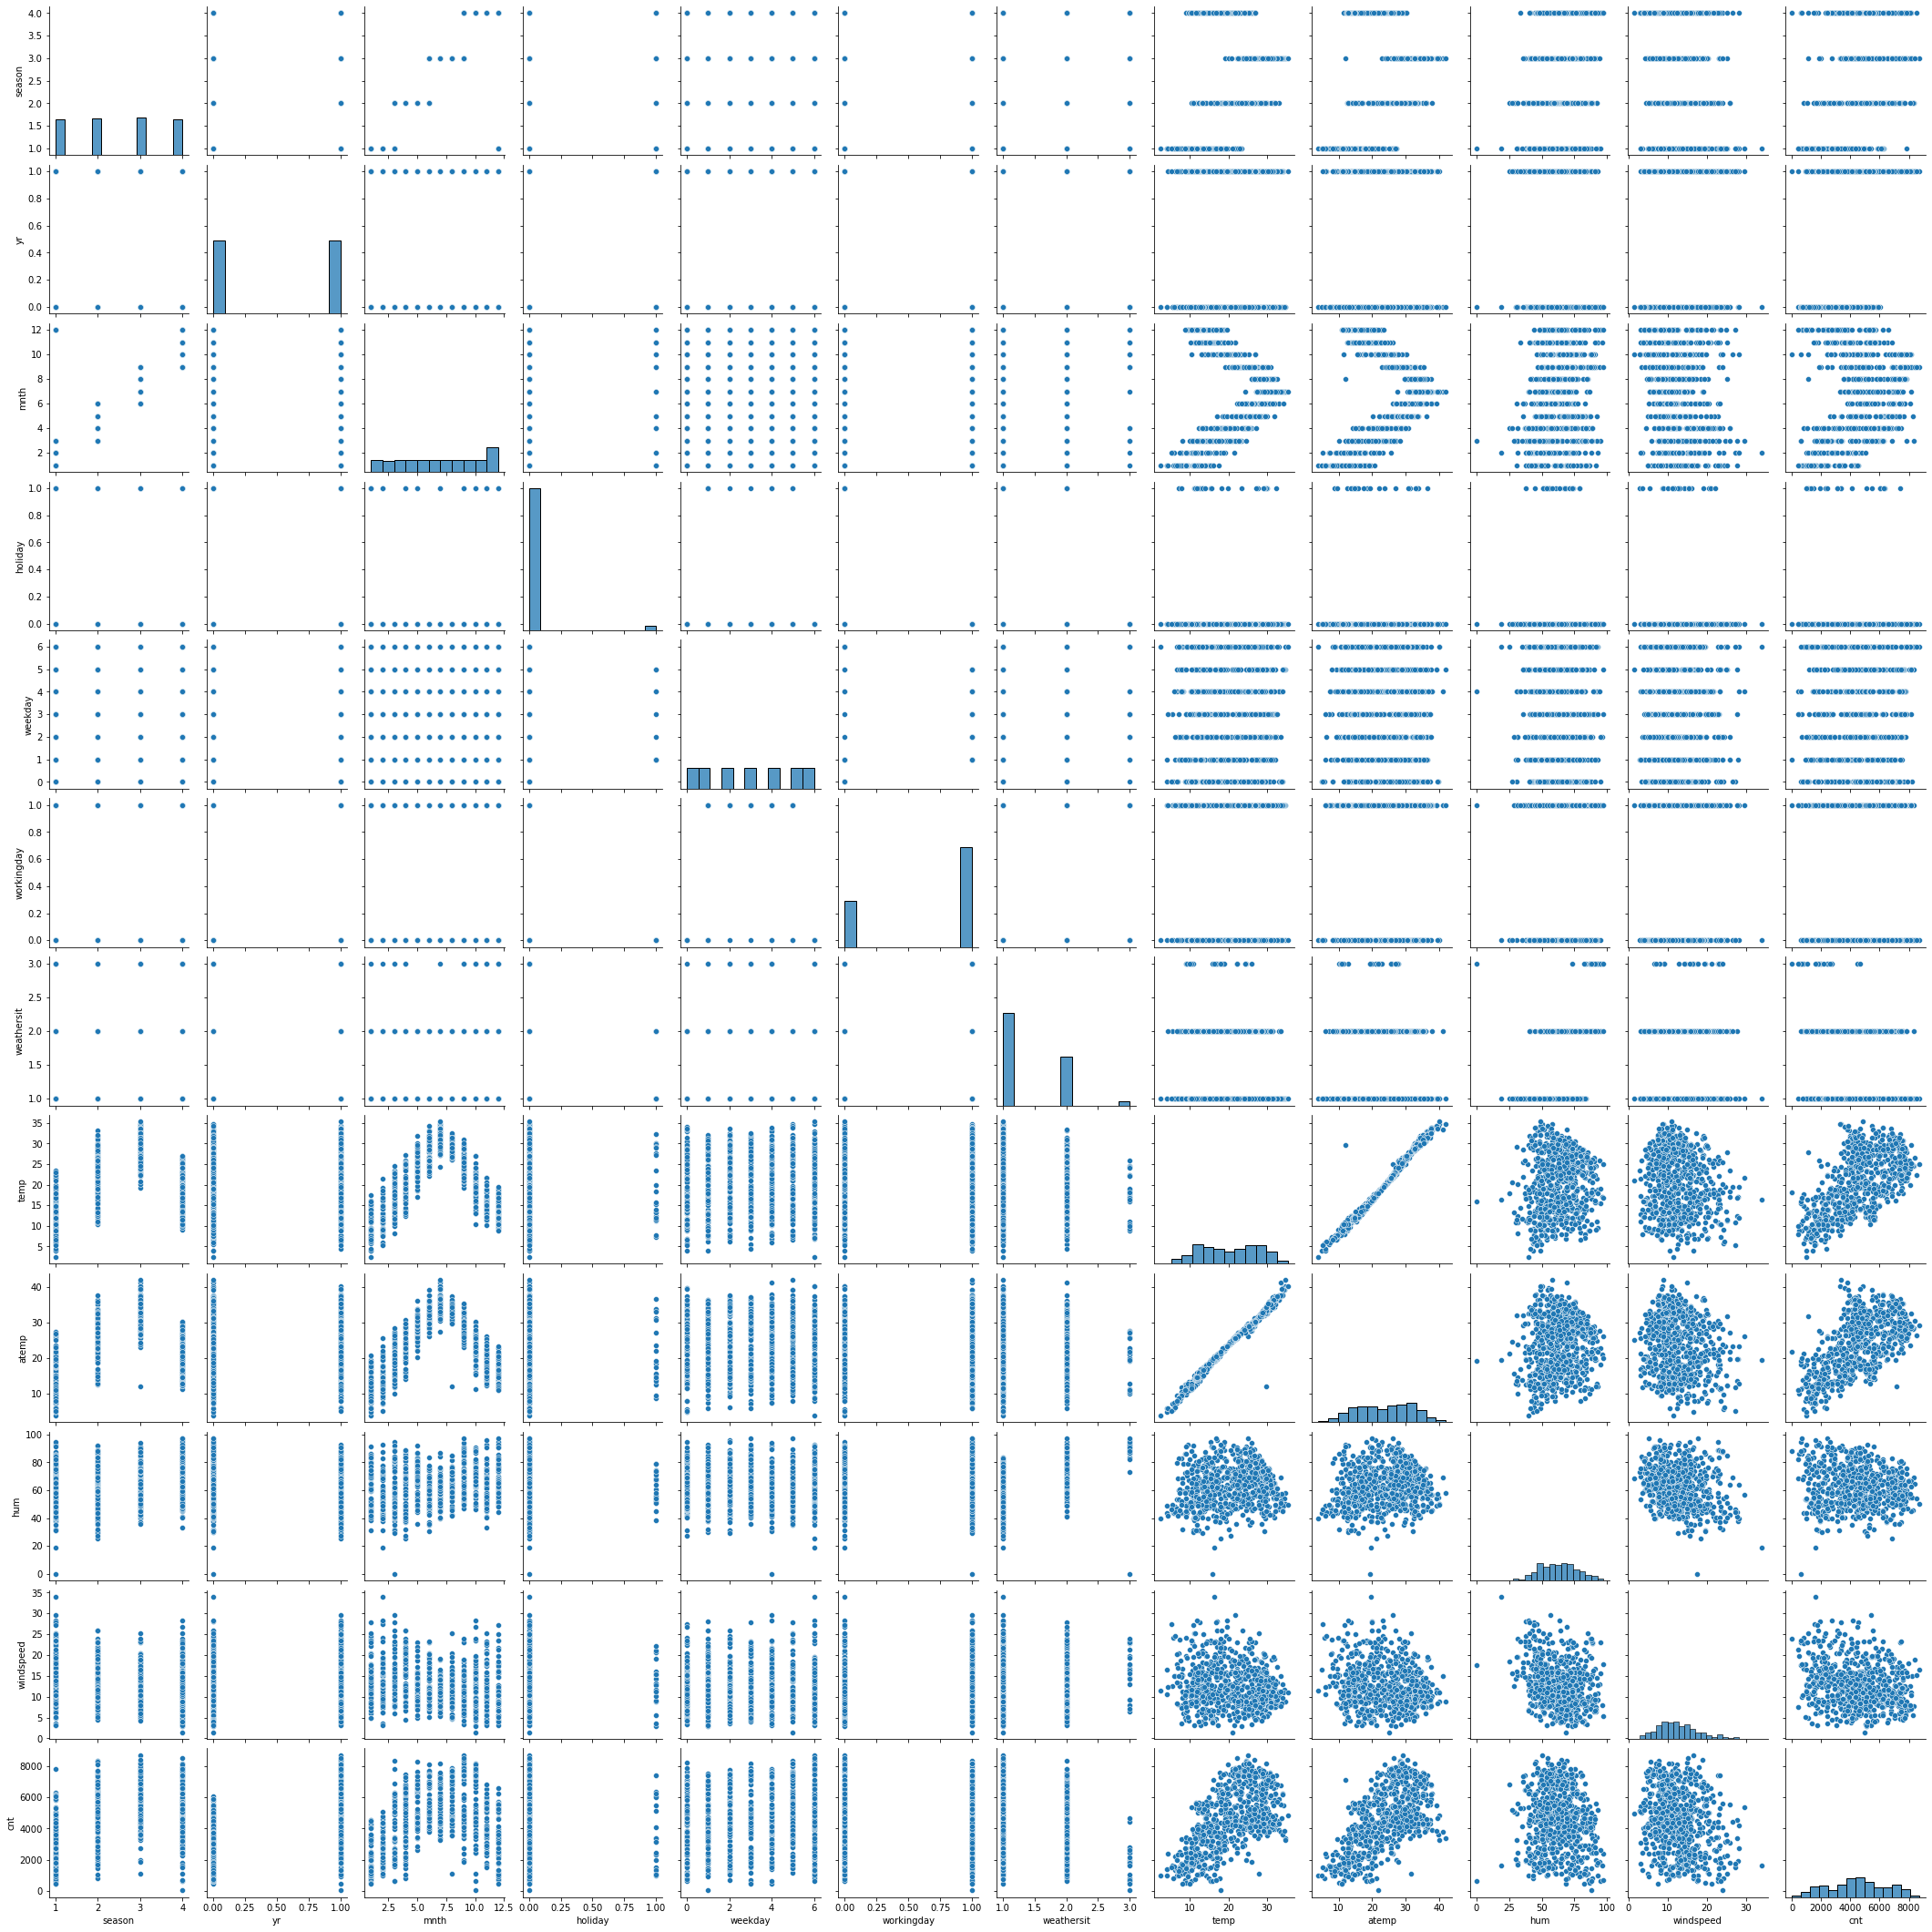

In [12]:
sns.pairplot(df)
plt.show()

Temperature is having the linear relationship with cnt, so we can use a linear regression model here.

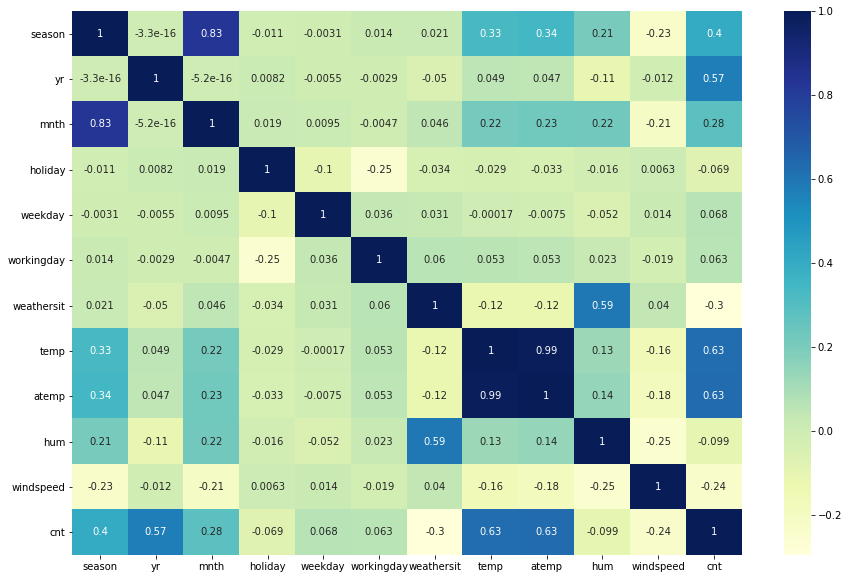

In [13]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

Temperature and cnt is having +0.63 correlation, which is maximum.

temp and atemp is having very high relation +0.99 so we can drop atemp column.

In [14]:
# Drop 'atemp' as it is similar to temp variable
df.drop(['atemp'], axis = 1, inplace = True)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


# Converting season to its dummy variables

In [15]:
df.season.dtype

dtype('int64')

In [16]:
df['season'] = df.season.astype('str')

In [17]:
df['season'].dtype

dtype('O')

This is the first way, through which i have converted the season into the dummy variable
First naming the columns variable and then creating its dummies

In [18]:
def season(val):
    return (val.replace("1","spring").replace("2","summer").replace("3","fall").replace("4","winter"))

In [19]:
df['season'] = df['season'].apply(season)
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [20]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status_season'

status_season = pd.get_dummies(df['season'], drop_first = True)

# Check what the dataset 'status_season' looks like
status_season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [21]:
# Add the results to the original df dataframe
df = pd.concat([df, status_season], axis = 1)

# Now let's see the head of our dataframe.
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,1,0,0


In [22]:
# Drop 'season' as we have created the dummies for it
df.drop(['season'], axis = 1, inplace = True)

df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,1,0,0


# Converting mnth to its dummy variables

In [23]:
df['mnth'] = df.mnth.astype('str')

In [24]:
df['mnth'].dtype

dtype('O')

In [25]:
df['mnth'].value_counts()

10    62
12    62
7     62
3     62
8     62
1     62
5     62
9     60
6     60
4     60
11    60
2     56
Name: mnth, dtype: int64

This is the second way, through which i have converted the season into the dummy variable
First converting to dummy and then renaming the column

In [26]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'status_mnth'
status_mnth = pd.get_dummies(df['mnth'], drop_first = True)

# Check what the dataset 'status_mnth' looks like
status_mnth.head()

,10,11,12,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [27]:
status_mnth.rename(columns = {'2':'Feb', '3':'March', '4':'April', '5':'May', '6':'June', '7':'July', '8':'Aug', '9':'Sept', '10':'Oct', '11':'Nov', '12':'Dec'}, inplace = True)

In [28]:
status_mnth.head()

,Oct,Nov,Dec,Feb,March,April,May,June,July,Aug,Sept
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# Add the results to the original df dataframe
df = pd.concat([df, status_mnth], axis = 1)

# Now let's see the head of our dataframe.
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,Nov,Dec,Feb,March,April,May,June,July,Aug,Sept
0,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Drop 'mnth' as we have created the dummies for it
df.drop(['mnth'], axis = 1, inplace = True)

df.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,Nov,Dec,Feb,March,April,May,June,July,Aug,Sept
0,0,0,6,0,2,14.110847,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,14.902598,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,1,8.200000,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,1,9.305237,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


# Converting weekday to its dummy variables

In [31]:
df.weekday.value_counts()

0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [32]:
df['weekday'] = df.weekday.astype('str')

In [33]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'status_weekday'
status_weekday = pd.get_dummies(df['weekday'], drop_first = True)

# Check what the dataset 'status_mnth' looks like
status_weekday.head()

,1,2,3,4,5,6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


It is starting with 0 as tuesday and we have drop the first columns because we can define it with the rest of the columns as well 

In [34]:
status_weekday.rename(columns = {'1':'Wed', '2':'Thur', '3':'Fri', '4':'Sat', '5':'Sun', '6':'Mon'}, inplace = True)

staring with 1 as wednesday and 6 as monday

In [35]:
status_weekday.head()

,Wed,Thur,Fri,Sat,Sun,Mon
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [36]:
# Add the results to the original df dataframe
df = pd.concat([df, status_weekday], axis = 1)

# Now let's see the head of our dataframe.
df.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,June,July,Aug,Sept,Wed,Thur,Fri,Sat,Sun,Mon
0,0,0,6,0,2,14.110847,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,2,14.902598,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,2,1,1,8.200000,59.0435,10.739832,1562,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,3,1,1,9.305237,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,1,0,0,0


In [37]:
# Drop 'weekday' as we have created the dummies for it
df.drop(['weekday'], axis = 1, inplace = True)

df.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,June,July,Aug,Sept,Wed,Thur,Fri,Sat,Sun,Mon
0,0,0,0,2,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,2,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,0,0


# Converting weathersit to its dummy variables

In [38]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [39]:
df['weathersit'] = df.weathersit.astype('str')

In [40]:
def weathersit(val):
    return (val.replace("1","clear").replace("2","mist_cloudy").replace("3","light_snow").replace("4","heavy_rain"))

In [41]:
df['weathersit'] = df['weathersit'].apply(weathersit)

In [42]:
df['weathersit'].value_counts()

clear          463
mist_cloudy    246
light_snow      21
Name: weathersit, dtype: int64

In [43]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'status_weathersit'

status_weathersit = pd.get_dummies(df['weathersit'])

# Check what the dataset 'status_weathersit' looks like
status_weathersit.head()

,clear,light_snow,mist_cloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [44]:
# Add the results to the original df dataframe
df = pd.concat([df, status_weathersit], axis = 1)

# Now let's see the head of our dataframe.
df.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,Sept,Wed,Thur,Fri,Sat,Sun,Mon,clear,light_snow,mist_cloudy
0,0,0,0,mist_cloudy,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,mist_cloudy,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,clear,8.050924,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,1,0,0,0,1,0,0


In [45]:
# Drop 'weathersit' as we have created the dummies for it
df.drop(['weathersit'], axis = 1, inplace = True)

df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sept,Wed,Thur,Fri,Sat,Sun,Mon,clear,light_snow,mist_cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [46]:
list(df.columns)

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'cnt',
 'spring',
 'summer',
 'winter',
 'Oct',
 'Nov',
 'Dec',
 'Feb',
 'March',
 'April',
 'May',
 'June',
 'July',
 'Aug',
 'Sept',
 'Wed',
 'Thur',
 'Fri',
 'Sat',
 'Sun',
 'Mon',
 'clear',
 'light_snow',
 'mist_cloudy']

In [47]:
varlist = ['yr',
 'holiday',
 'workingday',
 'spring',
 'summer',
 'winter',
 'Oct',
 'Nov',
 'Dec',
 'Feb',
 'March',
 'April',
 'May',
 'June',
 'July',
 'Aug',
 'Sept',
 'Wed',
 'Thur',
 'Fri',
 'Sat',
 'Sun',
 'Mon',
 'clear',
 'light_snow',
 'mist_cloudy']

Getting all the columns having value 0 and 1 in the varlist

In [48]:
num_feature = ['temp', 'hum', 'windspeed', 'cnt']

Getting all the columns having value other than 0 and 1 in the num_feature

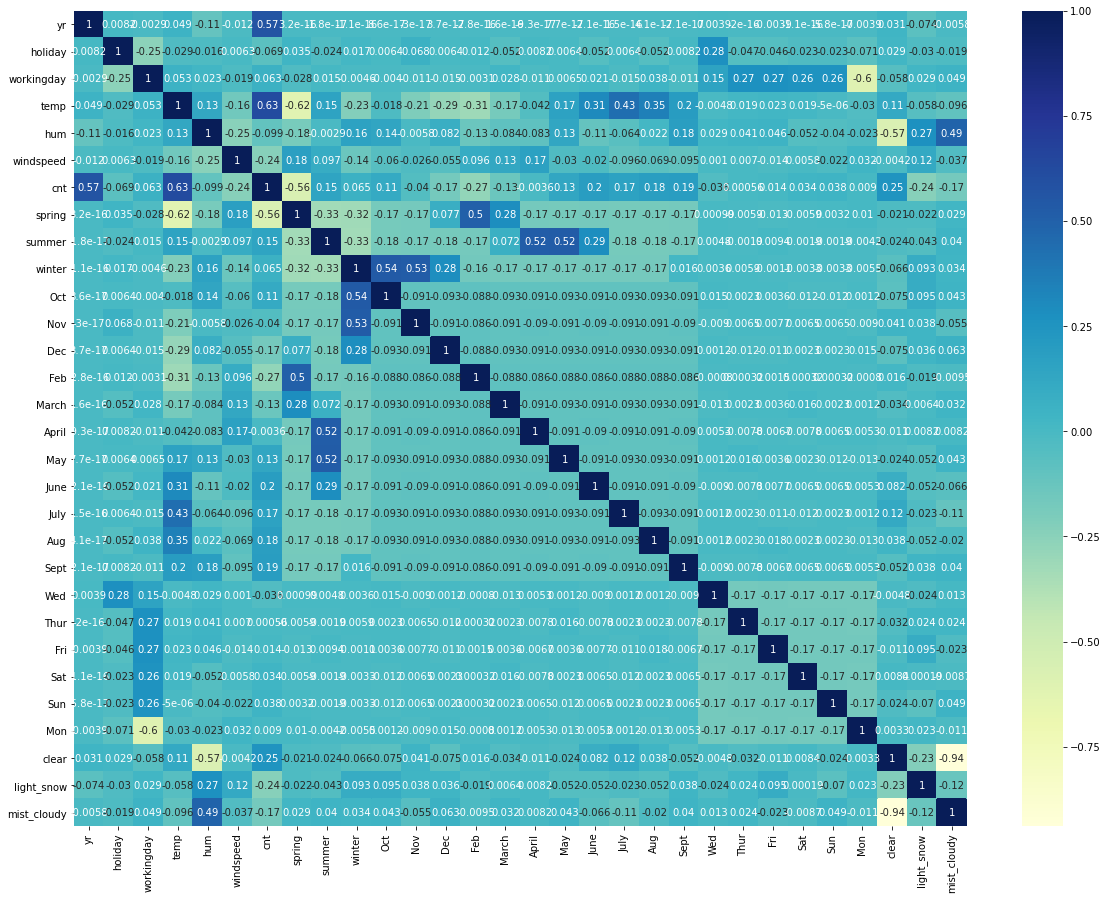

In [49]:
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

Creating the heatmap of correlatation of all the columns with each other.
We are getting the maximum correlation of cnt with year column of +0.57 and spring of -0.56

<Figure size 432x432 with 0 Axes>

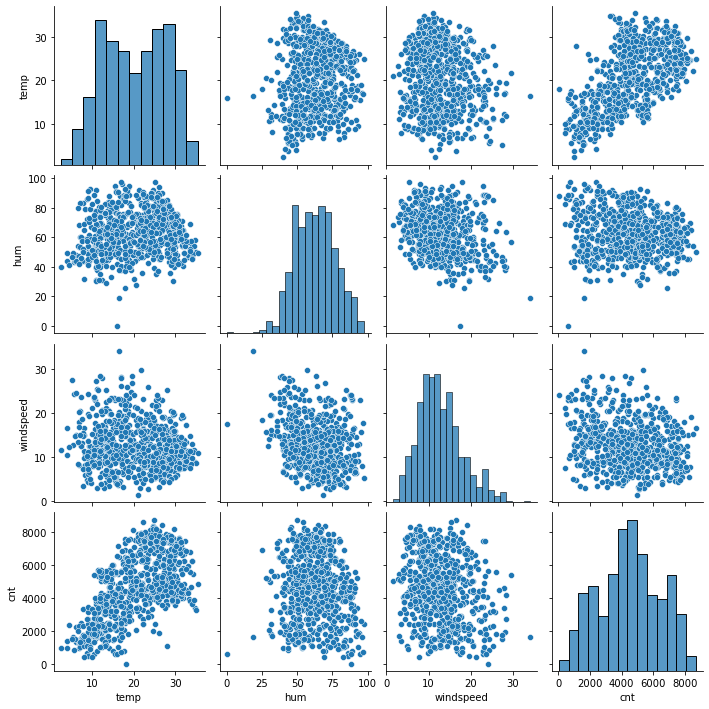

In [50]:
plt.figure(figsize = (6, 6))
sns.pairplot(df[num_feature])
plt.show()

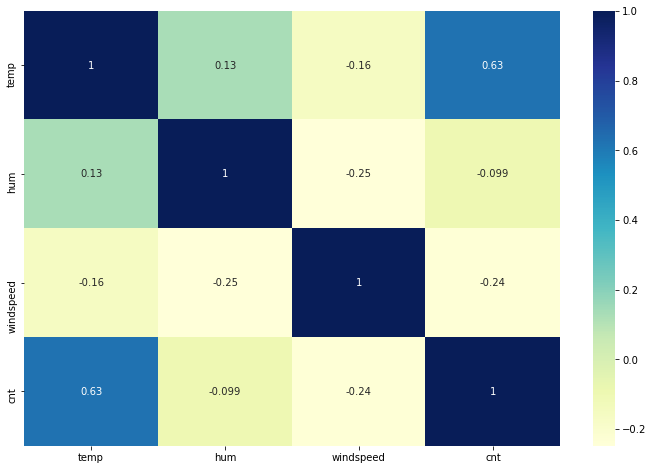

In [51]:
plt.figure(figsize = (12, 8))
sns.heatmap(df[num_feature].corr(), annot = True, cmap = 'YlGnBu')
plt.show()

# Spliting the train and test data set

In [52]:
df_train, df_test = train_test_split(df, train_size = 0.70, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


Spliting the data with the 70% size of training data set and 30% size of test data set. 

In [53]:
scaler = MinMaxScaler()
df_train[num_feature] = scaler.fit_transform(df_train[num_feature])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sept,Wed,Thur,Fri,Sat,Sun,Mon,clear,light_snow,mist_cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,1,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,1,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,1,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,1,0,0,0,1


Now scaling down the Num_feature columns, so that they will also lie in between 0 and 1. This is done with MinMax scaler
Doing this is necessary as all the variable should be in the same range of values so that we can predict their importance with there coefficient.

In [54]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sept,Wed,Thur,Fri,Sat,Sun,Mon,clear,light_snow,mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.080392,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.625490,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.272166,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.484471,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


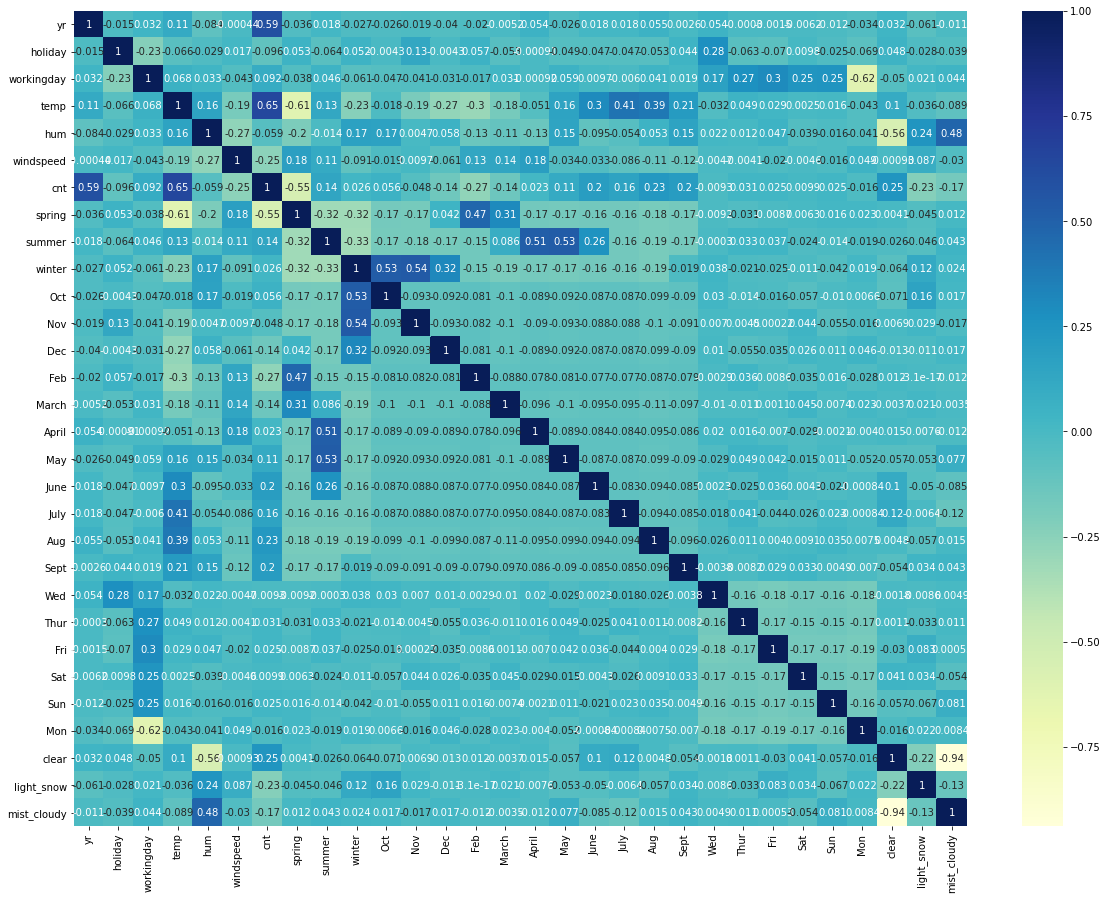

In [55]:
plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

Correlation heat map of all the variable of the training data set 
We are getting the maximum correlation of cnt with year column of +0.59 and spring of -0.55

In [56]:
# Seprating X_train and y_train data set from the training data set.
y_train = df_train.pop('cnt')
X_train = df_train

In [57]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Oct,...,Sept,Wed,Thur,Fri,Sat,Sun,Mon,clear,light_snow,mist_cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [58]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [59]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

TypeError: __init__() takes 2 positional arguments but 3 were given

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]
col

These are the top 15 columns which RFE has selected. 

In [ ]:
X_train.columns[~rfe.support_]

These are the columns which RFE has rejected. 

In [ ]:
# Imputing only those columns to the X_train data set which are having the columns selected by the RFE method
X_train_rfe = X_train[col]

In [ ]:
# Adding a constant variable 

X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
 # Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [ ]:
# Summary of our linear model
print(lm.summary())

1. R - Squared is comming out to be 0.805 and Adj. R-squared is comming out to be 0.80, which is pritty decent.
2. Prob (F-statistic) is comming out to be 9.06e-167 which is very low which means that the overall model commimg out is significant.
3. Since Friday is having the maximum p value which is 0.955, which means that it is most insignificant , so we can drop it. 

In [ ]:
# Dropping Friday column
X_train_new = X_train_rfe.drop(['Fri'], axis = 1)

In [ ]:
X_train_new.head()

In [ ]:
# Running the linear model
lm = sm.OLS(y_train,X_train_new).fit()   

In [ ]:
# Summary of our linear model
print(lm.summary())

In [ ]:
# Seeing the VIF value to check the multicolinearity of variable with each other.
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

1. R - Squared is comming out to be 0.805 and Adj. R-squared is comming out to be 0.80, which is pritty decent.
2. Prob (F-statistic) is comming out to be 9.06e-167 which is very low which means that the overall model commimg out is significant.
3. Since 'clear', 'light_snow', 'mist_cloudy' VIF value is infinity whcih means that these 3 variable are highly co related with the other variable, so we can drop any one of the three variable.
4. So i am droping 'mist_cloudy'

In [ ]:
# Droping mist_cloudy column
X_train_new = X_train_new.drop(['mist_cloudy'], axis = 1)

In [ ]:
# Running the linear model
lm = sm.OLS(y_train,X_train_new).fit()   

# Summary of our linear model
print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

1. R - Squared is comming out to be 0.805 and Adj. R-squared is comming out to be 0.80, which is pritty decent.
2. Prob (F-statistic) is comming out to be 9.06e-167 which is very low which means that the overall model commimg out is significant.
3. Since Sunday is having the maximum p value which is 0.957, which means that it is most insignificant , so we can drop it.

In [ ]:
# Droping Sunday column
X_train_new = X_train_new.drop(['Sun'], axis = 1)

In [ ]:
# Running the linear model
lm = sm.OLS(y_train,X_train_new).fit()   

# Summary of our linear model
print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

1. R - Squared is comming out to be 0.805 and Adj. R-squared is comming out to be 0.801, which is pritty decent.
2. Prob (F-statistic) is comming out to be 6.78e-168 which is very low which means that the overall model commimg out is significant.
3. Since Saturday is having the maximum p value which is 0.650, which means that it is most insignificant , so we can drop it.

In [ ]:
# Droping Saturday column
X_train_new = X_train_new.drop(['Sat'], axis = 1)

In [ ]:
# Running the linear model
lm = sm.OLS(y_train,X_train_new).fit()   

# Summary of our linear model
print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

1. R - Squared is comming out to be 0.805 and Adj. R-squared is comming out to be 0.801, which is pritty decent.
2. Prob (F-statistic) is comming out to be 5.36e-169 which is very low which means that the overall model commimg out is significant.
3. Since Wednesday is having the high p value which is 0.316, which means that it is most insignificant , so we can drop it.

In [ ]:
# Droping the 'Wed' column
X_train_new = X_train_new.drop(['Wed'], axis = 1)

In [ ]:
# Running the linear model
lm = sm.OLS(y_train,X_train_new).fit()   

# Summary of our linear model
print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

1. R - Squared is comming out to be 0.805 and Adj. R-squared is comming out to be 0.801, which is pritty decent.
2. Prob (F-statistic) is comming out to be 6.01e-170 which is very low which means that the overall model commimg out is significant.
3. Since Thursday is having the high p value which is 0.494, which means that it is most insignificant , so we can drop it.

In [ ]:
# Dropping Thursday column
X_train_new = X_train_new.drop(['Thur'], axis = 1)

In [ ]:
# Running the linear model
lm = sm.OLS(y_train,X_train_new).fit()   

# Summary of our linear model
print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

1. R - Squared is comming out to be 0.805 and Adj. R-squared is comming out to be 0.801, which is pritty decent.
2. Prob (F-statistic) is comming out to be 4.88e-171 which is very low which means that the overall model commimg out is significant.
3. Since workingday is having the high p value which is 0.056, which is greater than 0.05, which means that it is insignificant , so we can drop it.

In [ ]:
# Dropping 'workingday' column
X_train_new = X_train_new.drop(['workingday'], axis = 1)

In [ ]:
# Running the linear model
lm = sm.OLS(y_train,X_train_new).fit()  

# Summary of our linear model
print(lm.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

1. R - Squared is comming out to be 0.803 and Adj. R-squared is comming out to be 0.80, which is pritty decent. The model is able to explanin 80.3% variance in the data and Adj. R-squared value is also very near to it.
2. Prob (F-statistic) is comming out to be 1.83e-171 which is very low which means that the overall model commimg out is significant.
3. Since maximum p value of all the variable is very less (less than 0.05), this means that all the variable in this model is significan and we cannot drop any variable now.
4. VIF of all the variable is well bellow 5 so non of the variable is explaned by other variable.
5. So this is our final model with the variable 'hum', 'clear', 'temp', 'windspeed', 'winter', 'light_snow', 'yr', 'holiday'.

# Now predicting the y value with out model on the train data

In [ ]:
# Pridicting the y value with our regression model
y_train_pred = lm.predict(X_train_new)

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

Since the error are normally distributed with mean at zero, this mean that there is no pattern in the error, so we have not left any thing in our model

# Now testing our model on the test data set

First transforming the test data set in the same sace in which traing data set was there.

In [ ]:
df_test[num_feature] = scaler.transform(df_test[num_feature])

In [ ]:
# Creating the y_test and X_test data set from the test data set
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test)

In [ ]:
# Now we will use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test which are not a part of our model
X_test_new = X_test_new[X_train_new.columns]

In [ ]:
X_test_new.head()

In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

The scatter plot between y predected and actual y value in the test data set shows a linear pattern and having a constant variance.

In [ ]:
# evaluate the R2 score of te test data set
r2_score(y_true = y_test, y_pred = y_pred)

R2 score of train data was 80.3% and for test data it comes out to be 77.5%, since the difference of rhe values is around 2.8%, which is below 5%. So we can except this model. 

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  

Since the error are normally distributed with mean at zero, this mean that there is no pattern in the error, so we have not left any thing in our model